In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

In [ ]:
!gdown --id 1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6
To: /content/NonLinear_data.npy
100% 5.57k/5.57k [00:00<00:00, 5.14MB/s]


In [ ]:
data_path = "/content/NonLinear_data.npy"
data = np.load(data_path, allow_pickle=True).item()
X, labels = data["X"], data["labels"] 
X, labels = X.astype(np.float32), labels.astype(np.float32)

In [ ]:
num_class = 3
SR_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=3, input_shape=[2], activation='softmax') 
    # tf.keras.layers.Dense(units=1)
])

SR_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
SR_opt = tf.keras.optimizers.SGD(learning_rate=0.01)
SR_loss = tf.keras.losses.SparseCategoricalCrossentropy() 
SR_model.compile(optimizer=SR_opt, loss = SR_loss, metrics=['accuracy'])

SR_history = SR_model.fit(X, labels, batch_size=X.shape[0]//2, epochs=500, verbose=2)

Epoch 1/500
2/2 - 1s - loss: 0.9361 - accuracy: 0.5233 - 594ms/epoch - 297ms/step
Epoch 2/500
2/2 - 0s - loss: 0.9358 - accuracy: 0.5233 - 8ms/epoch - 4ms/step
Epoch 3/500
2/2 - 0s - loss: 0.9355 - accuracy: 0.5233 - 7ms/epoch - 3ms/step
Epoch 4/500
2/2 - 0s - loss: 0.9352 - accuracy: 0.5233 - 10ms/epoch - 5ms/step
Epoch 5/500
2/2 - 0s - loss: 0.9349 - accuracy: 0.5233 - 7ms/epoch - 4ms/step
Epoch 6/500
2/2 - 0s - loss: 0.9347 - accuracy: 0.5233 - 7ms/epoch - 3ms/step
Epoch 7/500
2/2 - 0s - loss: 0.9344 - accuracy: 0.5233 - 6ms/epoch - 3ms/step
Epoch 8/500
2/2 - 0s - loss: 0.9341 - accuracy: 0.5233 - 8ms/epoch - 4ms/step
Epoch 9/500
2/2 - 0s - loss: 0.9338 - accuracy: 0.5267 - 8ms/epoch - 4ms/step
Epoch 10/500
2/2 - 0s - loss: 0.9335 - accuracy: 0.5267 - 8ms/epoch - 4ms/step
Epoch 11/500
2/2 - 0s - loss: 0.9332 - accuracy: 0.5267 - 6ms/epoch - 3ms/step
Epoch 12/500
2/2 - 0s - loss: 0.9330 - accuracy: 0.5267 - 6ms/epoch - 3ms/step
Epoch 13/500
2/2 - 0s - loss: 0.9327 - accuracy: 0.5267 

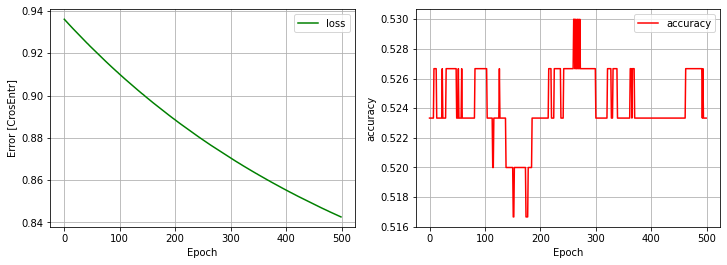

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(SR_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(SR_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)



In [ ]:
hist = pd.DataFrame(SR_history.history)
hist['epoch'] = SR_history.epoch
hist.tail()

,loss,accuracy,epoch
495,0.936861,0.516667,495
496,0.936717,0.516667,496
497,0.936574,0.516667,497
498,0.936431,0.516667,498
499,0.936287,0.520000,499


In [ ]:
print("Max train acc: ", max(hist['accuracy']))
print("Min train loss: ", min(hist['loss']))  

Max train acc:  0.5199999809265137
Min train loss:  0.9362873435020447


In [ ]:
RL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, input_shape=[2], activation='relu'), 
    tf.keras.layers.Dense(3)
])

RL_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
RL_loss = tf.keras.losses.SparseCategoricalCrossentropy()
RL_opt = tf.keras.optimizers.SGD(learning_rate=0.01)
RL_model.compile(optimizer=RL_opt,loss=RL_loss, metrics=['accuracy'])
RL_history = RL_model.fit(X, labels, batch_size=X.shape[0], epochs=500, verbose=2)

Epoch 1/500
1/1 - 2s - loss: 6.0658 - accuracy: 0.3333 - 2s/epoch - 2s/step
Epoch 2/500
1/1 - 0s - loss: 6.0658 - accuracy: 0.3333 - 6ms/epoch - 6ms/step
Epoch 3/500
1/1 - 0s - loss: 6.0658 - accuracy: 0.3333 - 5ms/epoch - 5ms/step
Epoch 4/500
1/1 - 0s - loss: 6.0658 - accuracy: 0.3333 - 5ms/epoch - 5ms/step
Epoch 5/500
1/1 - 0s - loss: 6.0658 - accuracy: 0.3333 - 8ms/epoch - 8ms/step
Epoch 6/500
1/1 - 0s - loss: 6.0658 - accuracy: 0.3333 - 4ms/epoch - 4ms/step
Epoch 7/500
1/1 - 0s - loss: 6.0658 - accuracy: 0.3333 - 5ms/epoch - 5ms/step
Epoch 8/500
1/1 - 0s - loss: 6.0658 - accuracy: 0.3333 - 9ms/epoch - 9ms/step
Epoch 9/500
1/1 - 0s - loss: 6.0658 - accuracy: 0.3333 - 4ms/epoch - 4ms/step
Epoch 10/500
1/1 - 0s - loss: 6.0658 - accuracy: 0.3333 - 5ms/epoch - 5ms/step
Epoch 11/500
1/1 - 0s - loss: 6.0658 - accuracy: 0.3333 - 5ms/epoch - 5ms/step
Epoch 12/500
1/1 - 0s - loss: 6.0658 - accuracy: 0.3333 - 5ms/epoch - 5ms/step
Epoch 13/500
1/1 - 0s - loss: 6.0658 - accuracy: 0.3333 - 7ms/e

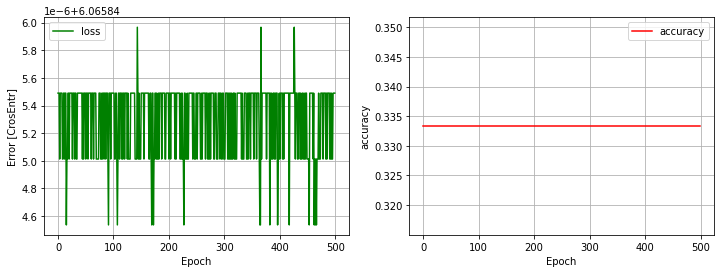

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(RL_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(RL_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(RL_history.history)
hist['epoch'] = RL_history.epoch
hist.tail()

,loss,accuracy,epoch
495,6.065845,0.333333,495
496,6.065845,0.333333,496
497,6.065845,0.333333,497
498,6.065845,0.333333,498
499,6.065845,0.333333,499


In [ ]:
print("Max train acc: ", max(hist['accuracy']))
print("Min train loss: ", min(hist['loss']))

Max train acc:  0.3333333432674408
Min train loss:  6.065844535827637
